<a href="https://colab.research.google.com/github/kavyansh07/MLCOE-Task-4/blob/main/K_Means_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Input

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
cdf=pd.read_csv('/content/country_dataset.csv')

In [3]:
cdf # Displaying the whole dataset

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


from matplotlib import pyplot as plt
cdf['child_mort'].plot(kind='hist', bins=20, title='child_mort')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cdf['exports'].plot(kind='hist', bins=20, title='exports')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cdf['health'].plot(kind='hist', bins=20, title='health')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cdf['imports'].plot(kind='hist', bins=20, title='imports')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cdf.plot(kind='scatter', x='child_mort', y='exports', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cdf.plot(kind='scatter', x='exports', y='health', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cdf.plot(kind='scatter', x='health', y='imports', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cdf.plot(kind='scatter', x='imports', y='income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cdf['child_mort'].plot(kind='line', figsize=(8, 4), title='child_mort')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cdf['exports'].plot(kind='line', figsize=(8, 4), title='exports')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cdf['health'].plot(kind='line', figsize=(8, 4), title='health')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cdf['imports'].plot(kind='line', figsize=(8, 4), title='imports')
plt.gca().spines[['top', 'right']].set_visible(False)

In [4]:
cdf.shape # Shape of the dataset

(167, 10)

In [5]:
cdf.sample(10) # Displaying any random rows of the dataset

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
161,Uzbekistan,36.3,31.700,5.81,28.5000,4240,16.500,68.8,2.34,1380
11,Bahrain,8.6,69.500,4.97,50.9000,41100,7.440,76.0,2.16,20700
118,Paraguay,24.1,55.100,5.87,51.5000,7290,6.100,74.1,2.73,3230
67,Hungary,6.0,81.800,7.33,76.5000,22300,2.330,74.5,1.25,13100
8,Austria,4.3,51.300,11.00,47.8000,43200,0.873,80.5,1.44,46900
30,Cape Verde,26.5,32.700,4.09,61.8000,5830,0.505,72.5,2.67,3310
18,Bhutan,42.7,42.500,5.20,70.7000,6420,5.990,72.1,2.38,2180
95,Malaysia,7.9,86.900,4.39,71.0000,21100,7.270,74.5,2.15,9070
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.040,66.8,2.41,988
19,Bolivia,46.6,41.200,4.84,34.3000,5410,8.780,71.6,3.20,1980


In [6]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
cdf.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
cdf.columns # Name of the columns on our dataset

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [9]:
cdf.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [10]:
cdf.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
162    False
163    False
164    False
165    False
166    False
Length: 167, dtype: bool

In [11]:
cdf.shape

(167, 10)

In [12]:
cdf.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

# EDA

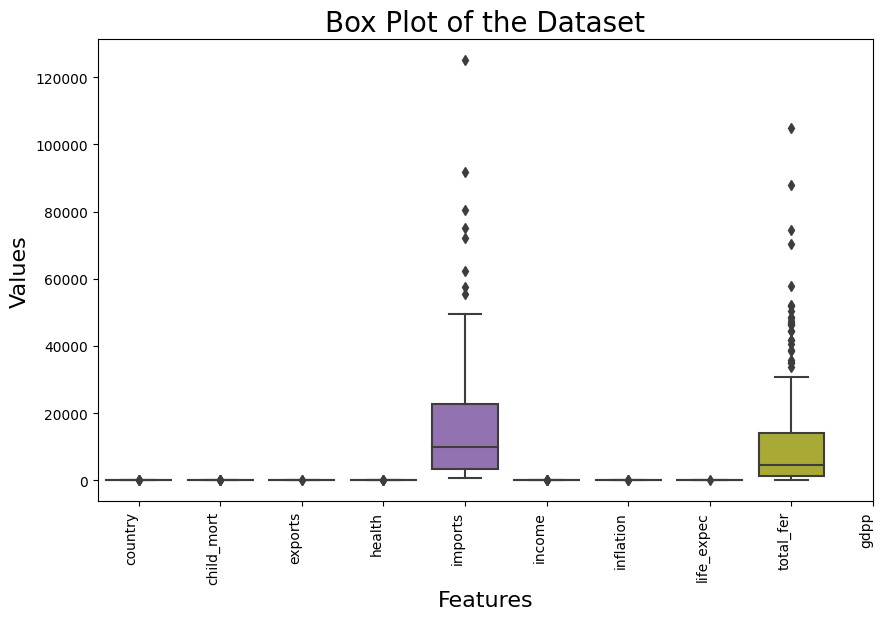

In [13]:
# Boxplot of the whole dataset
plt.figure(figsize=(10, 6))

sns.boxplot(data=cdf)
plt.title('Box Plot of the Dataset', size=20)
plt.xlabel('Features', size=16)
plt.ylabel('Values', size=16)

feature_names = [str(col) for col in cdf.columns]
plt.xticks(range(len(feature_names)), feature_names, rotation=90, ha='right')

plt.show()

<ipython-input-14-e34b2bd3d045>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cdf.corr(),annot=True,cmap='viridis')


<Axes: >

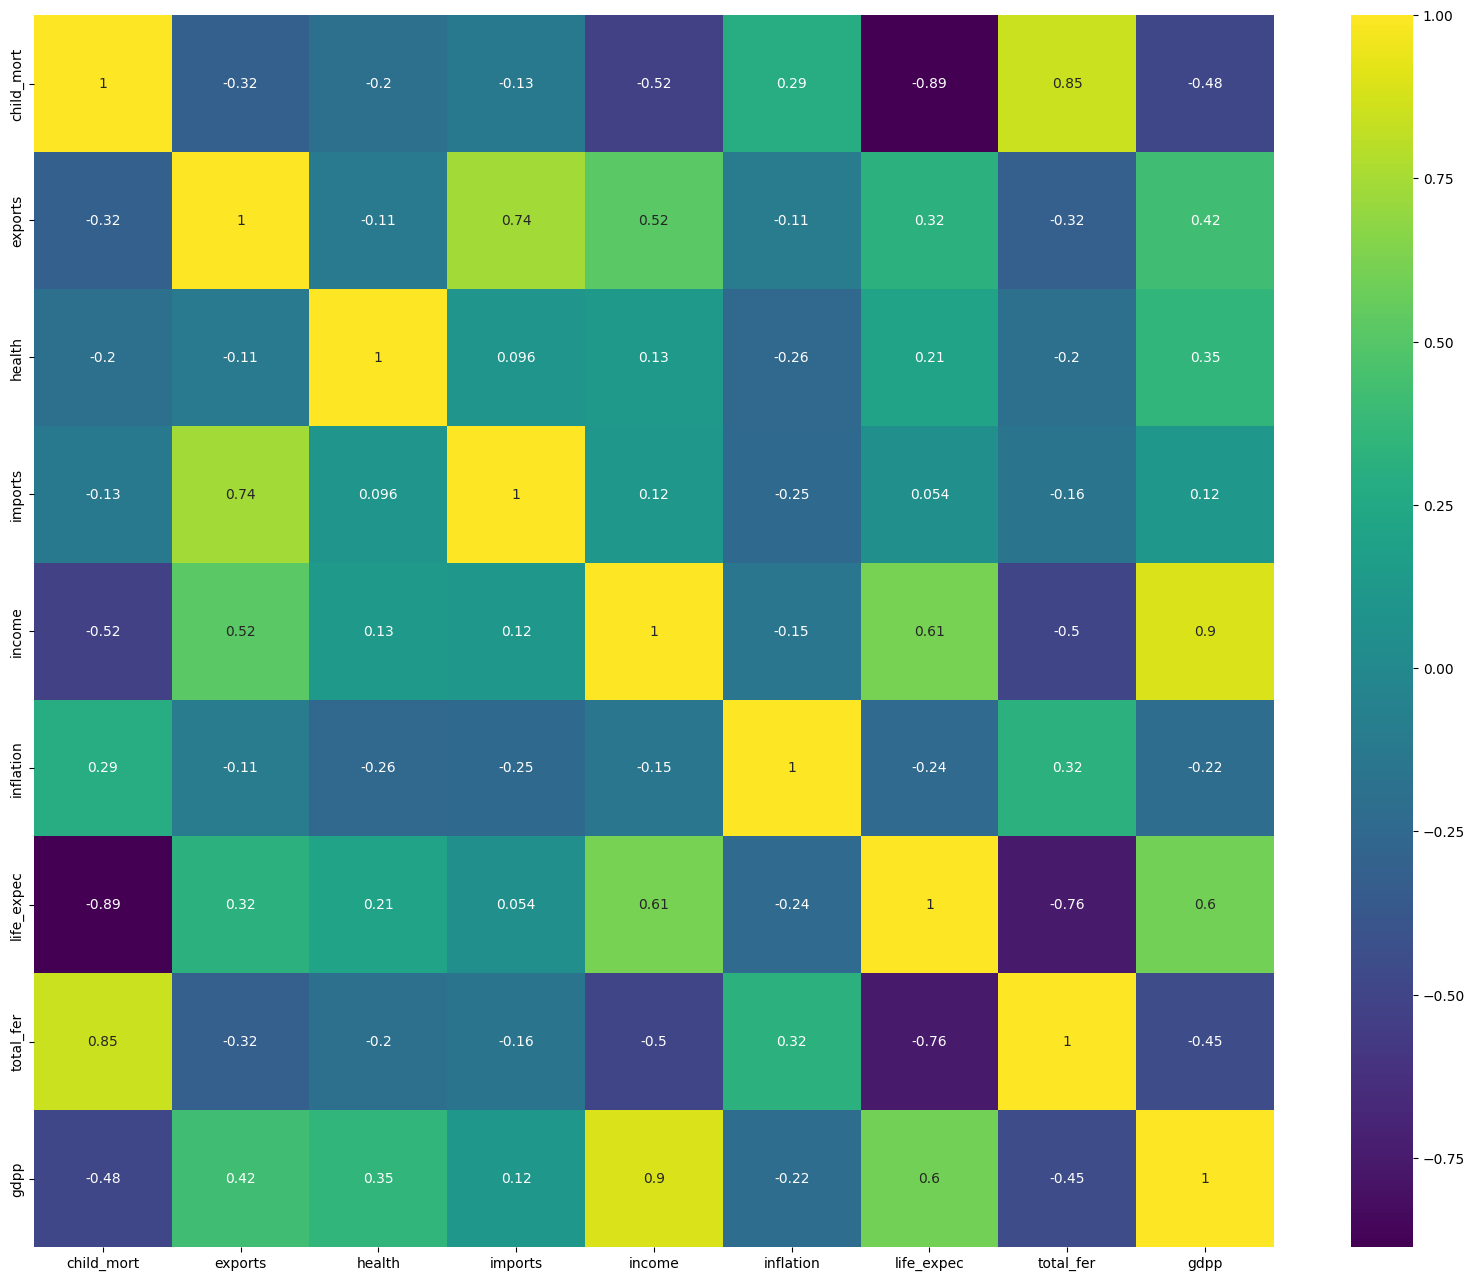

In [14]:
# Heatmap of the whole dataset
plt.figure(figsize=(20,16))
sns.heatmap(cdf.corr(),annot=True,cmap='viridis')

By the above heatmap, the following factors have an optimal correlation-


1.   GDP and Income
2.   Child Mortality and Total Fertility
3.   Imports vs Exports
4.   Income vs Exports



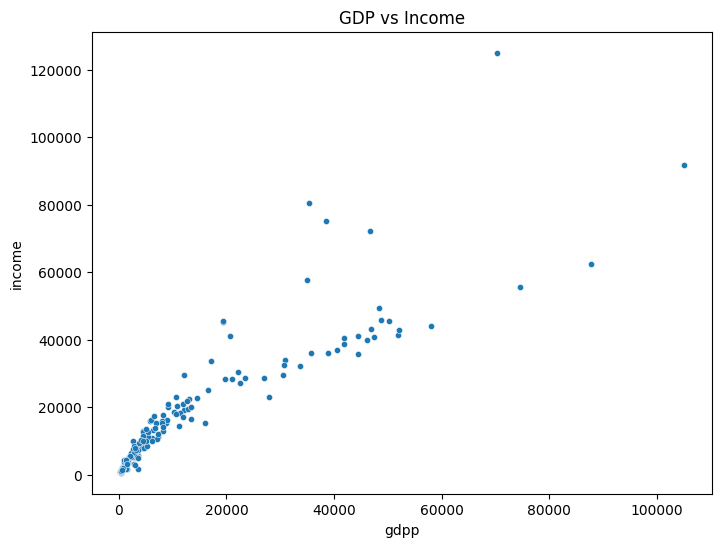

In [15]:
#Scatterplot of GDP vs Income
plt.figure(figsize=(8, 6))
sns.scatterplot(x='gdpp', y='income', data=cdf, s=20)

plt.title('GDP vs Income')
plt.xlabel('gdpp')
plt.ylabel('income')
plt.show()

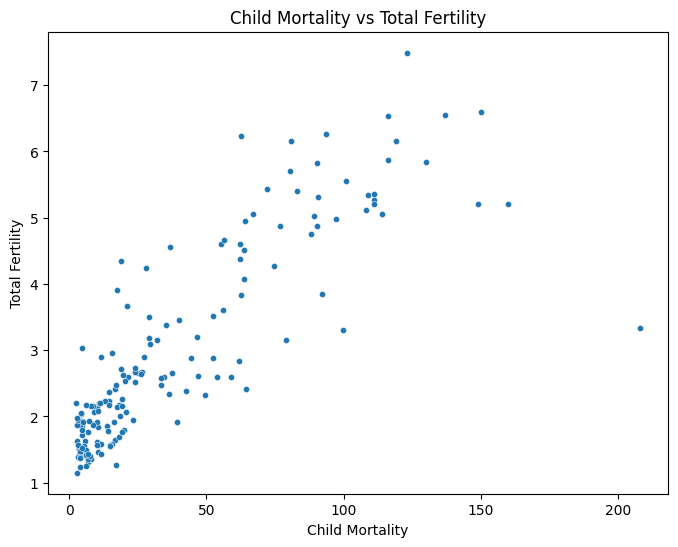

In [16]:
# Scatter of child_mort and total_fer
plt.figure(figsize=(8, 6))
sns.scatterplot(x='child_mort', y='total_fer', data=cdf, s=20)

plt.title('Child Mortality vs Total Fertility')
plt.xlabel('Child Mortality')
plt.ylabel('Total Fertility')
plt.show()

In [17]:
features = ["child_mort", "exports", "health", "imports", "income", "inflation", "life_expec", "total_fer", "gdpp"]
cdf_features = cdf[features]
# The above are the features of our dataset which will be used for our classification

In [18]:
# We need to scale the dataset
scaler = StandardScaler()
cdf_scaled = scaler.fit_transform(cdf_features)

In [19]:
# Calculate the value of k using Elbow method
wcss = [] # Within Cluster sum of square
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(cdf_scaled) #Fit the scaled data
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

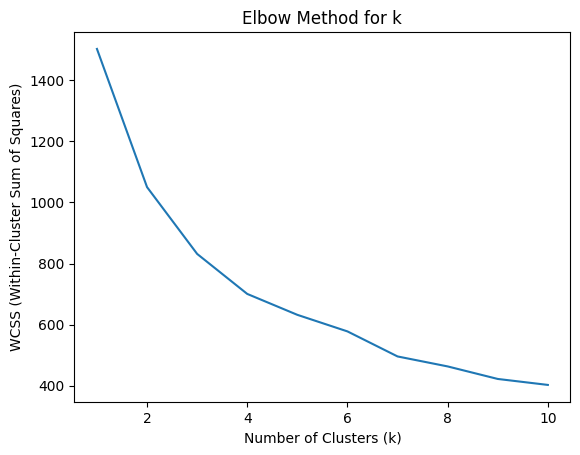

In [20]:
#Plot the wcss on graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [21]:
k = 3 #Since the suitable point where the wcss is reducing at a slower rate

In [22]:
km = KMeans(n_clusters=k)
cdf['cluster_label'] = km.fit_predict(cdf_scaled) # Predict the data, here we are predicting in which cluster, which value will occur

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
# Categorise countries in Clusters. We have 3 clusters, so its indexing will be Cluster 0, Cluster 1, Cluster 2.
for cluster_label in range(k):
    cluster_countries = cdf[cdf['cluster_label'] == cluster_label]['country']
    print(f"\nCountries in Cluster {cluster_label}:\n{cluster_countries}")


Countries in Cluster 0:
1                  Albania
2                  Algeria
4      Antigua and Barbuda
5                Argentina
6                  Armenia
              ...         
160                Uruguay
161             Uzbekistan
162                Vanuatu
163              Venezuela
164                Vietnam
Name: country, Length: 84, dtype: object

Countries in Cluster 1:
0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64  

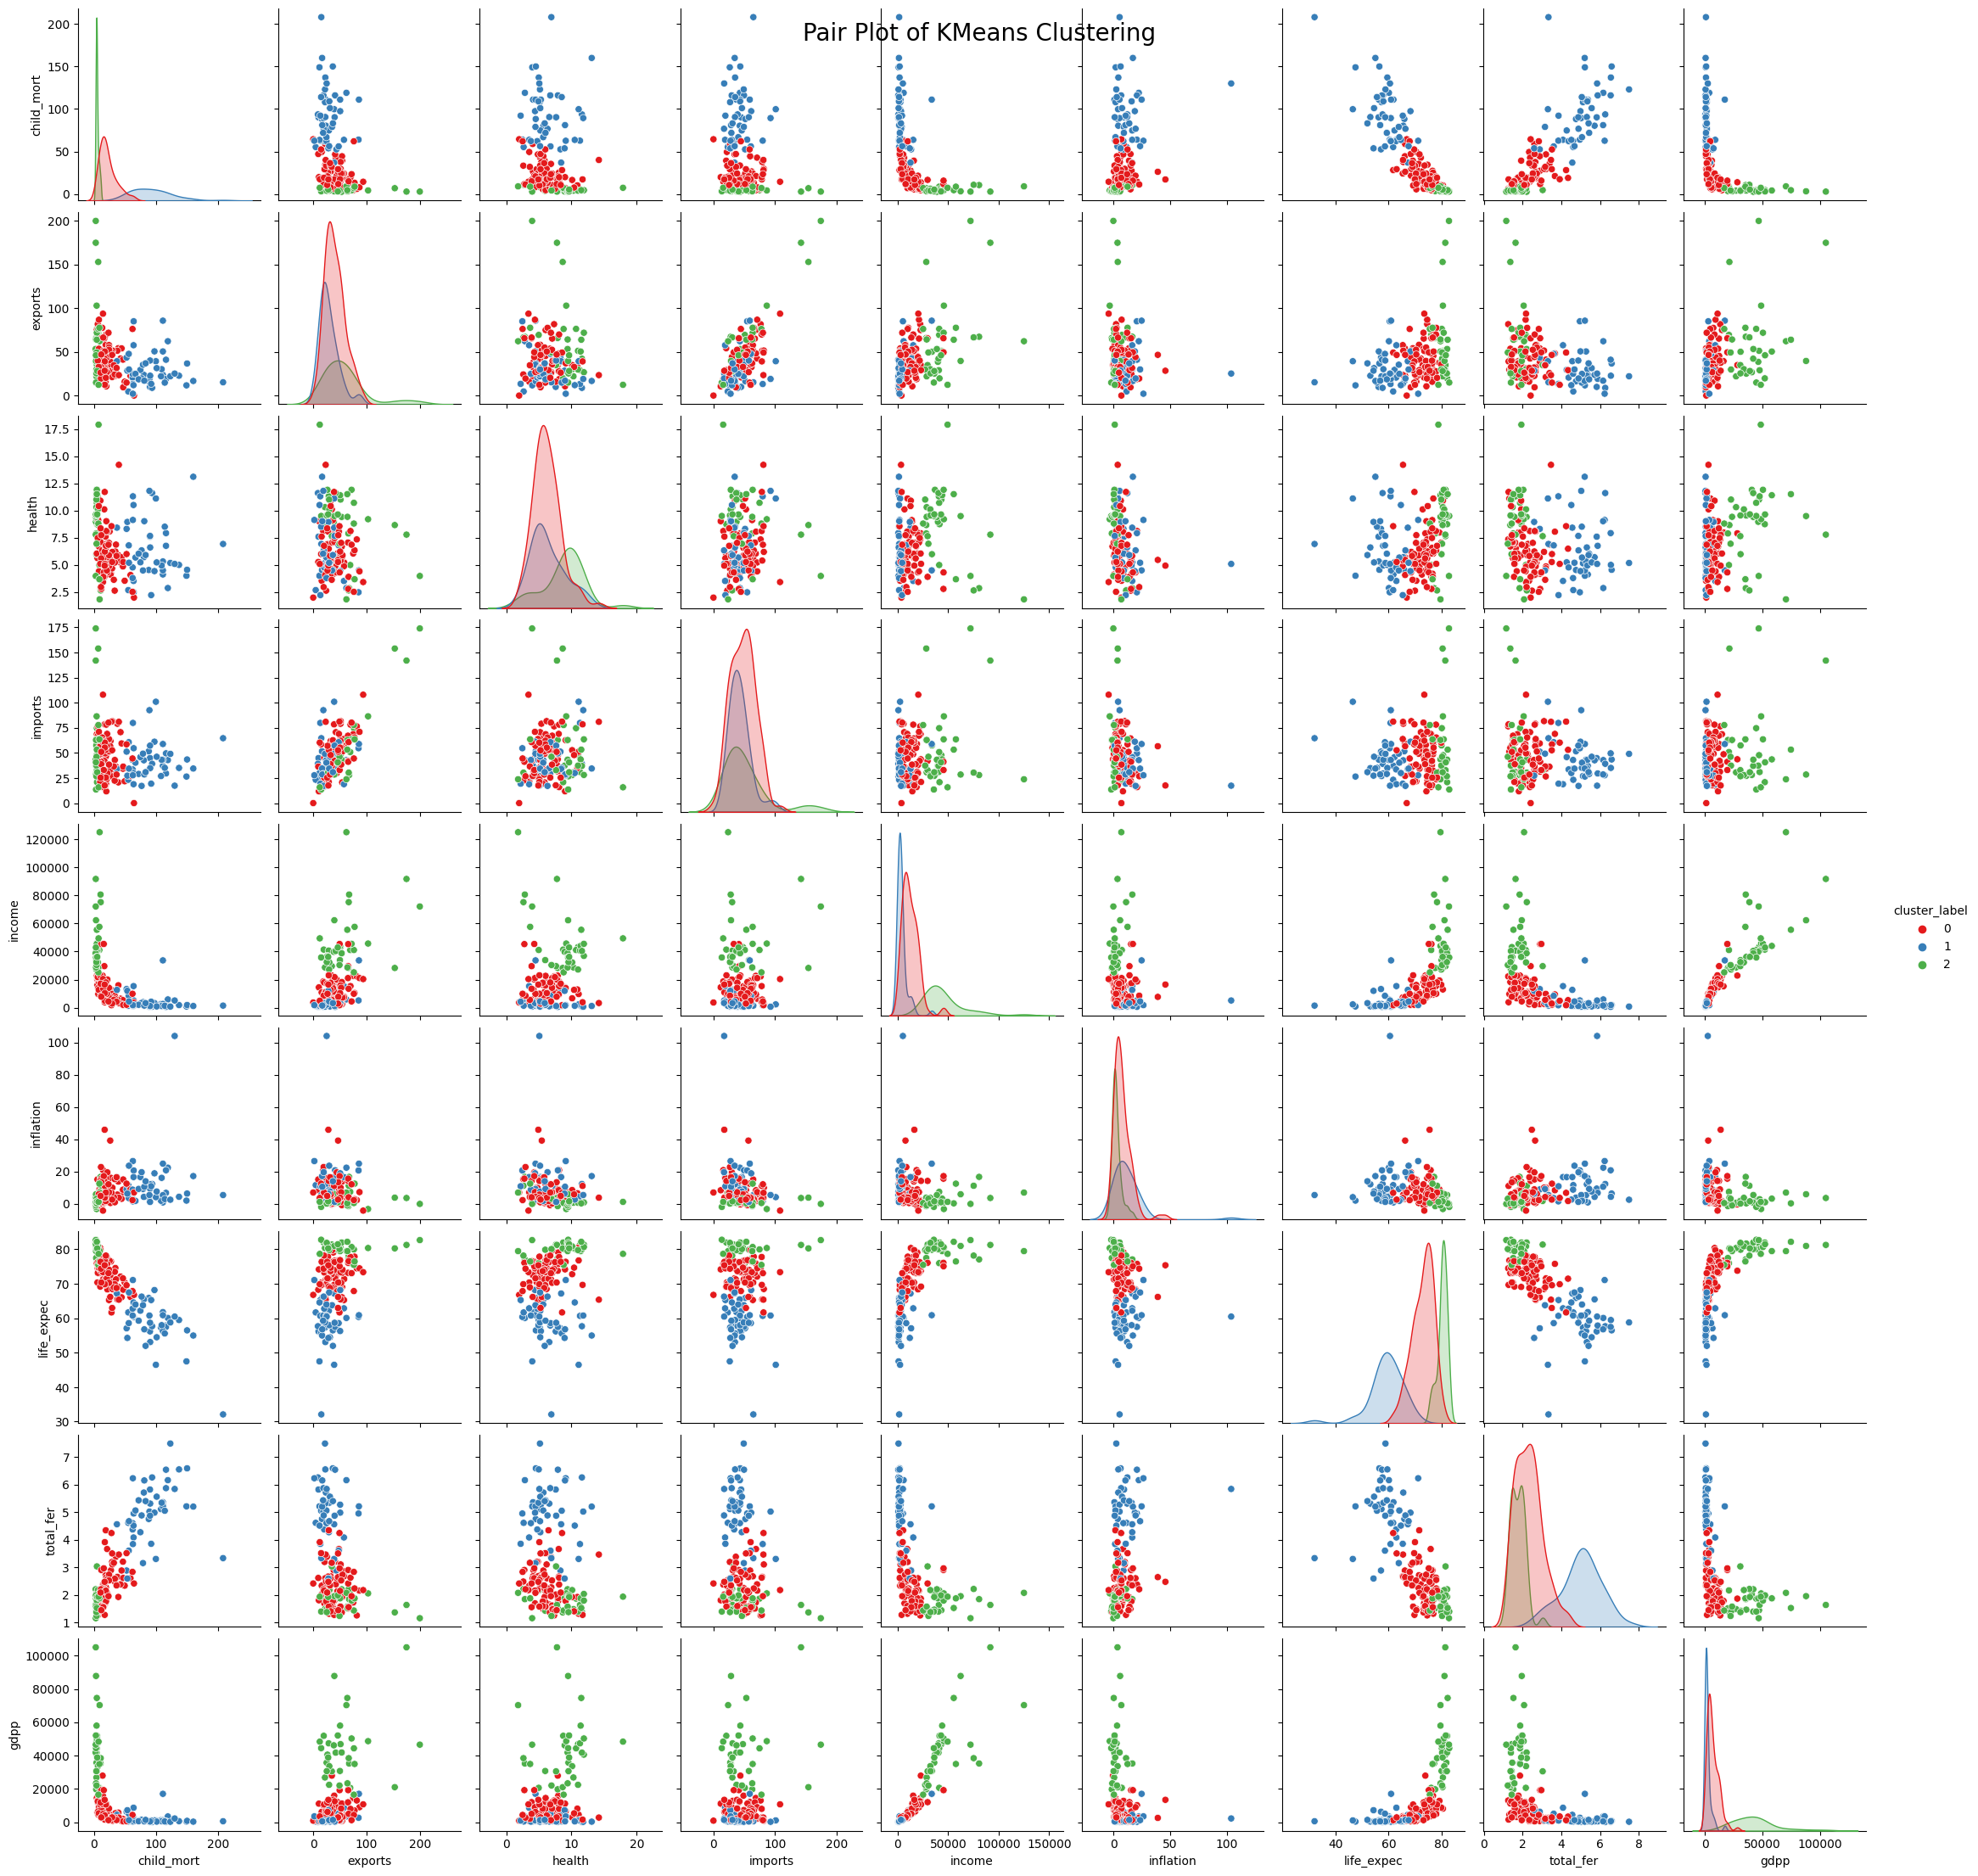

In [24]:
# Plot the whole K Map Cluster on Pairplot of all features wrt to other features
sns.pairplot(cdf, vars=features, hue='cluster_label', palette='Set1', diag_kind='kde', height=2.5)
plt.suptitle('Pair Plot of KMeans Clustering', size=20)
plt.show()

In [25]:
# Not all are having a disticnt cluster. So we will analyse from the graph which have distinct clusters so that we can get analysation of clusters.
# The line graph represents univariate feature.

# Analysation from the K Map

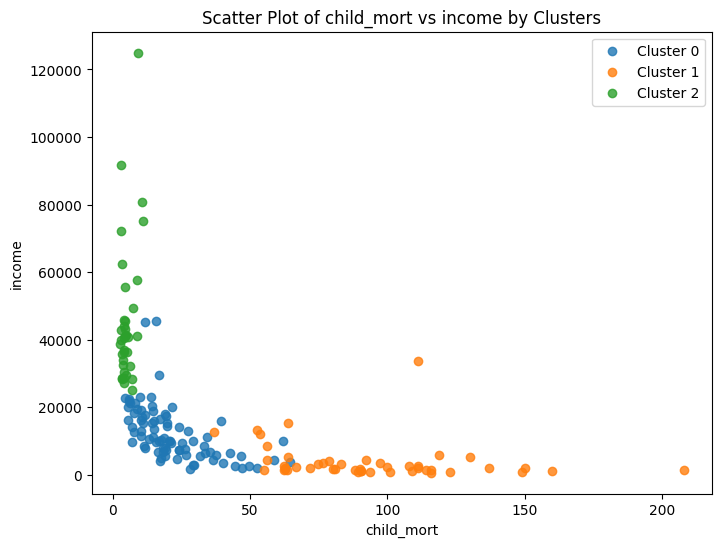

In [26]:
feat = ['child_mort', 'income']
plt.figure(figsize=(8, 6))
for cluster_label in range(k):
    cluster_data = cdf[cdf['cluster_label'] == cluster_label]
    plt.scatter(cluster_data[feat[0]], cluster_data[feat[1]], label=f'Cluster {cluster_label}', alpha=0.8)

plt.title(f'Scatter Plot of {feat[0]} vs {feat[1]} by Clusters')
plt.xlabel(feat[0])
plt.ylabel(feat[1])
plt.legend()
plt.show()

1. Countries in Cluster 0 has maximum income and there child mortality rate is also lower.

2. Countries in Cluster 1 has less income but there child mortality rate is low.

3. Countries in Cluster 2 has less income and there child mortality rate is higher.

***Conclusion-*** *Countires in Cluster 2 needs to improve in terms of income and child moortality rate*

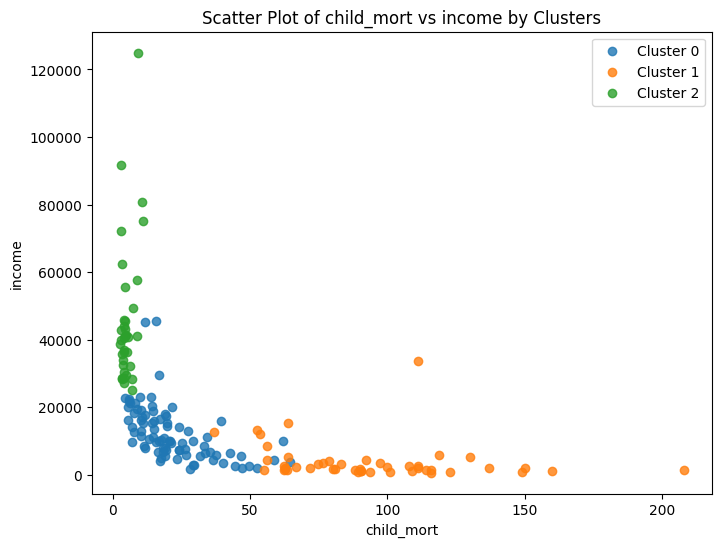

In [27]:
feat = ['child_mort', 'income']
plt.figure(figsize=(8, 6))
for cluster_label in range(k):
    cluster_data = cdf[cdf['cluster_label'] == cluster_label]
    plt.scatter(cluster_data[feat[0]], cluster_data[feat[1]], label=f'Cluster {cluster_label}', alpha=0.8)

plt.title(f'Scatter Plot of {feat[0]} vs {feat[1]} by Clusters')
plt.xlabel(feat[0])
plt.ylabel(feat[1])
plt.legend()
plt.show()

1. Cluster 0 countries have a higher life expectancy and less child mortality rate which is a good scenario.
2. Cluster 1 countries have lower child mortality rate and an average life expectacy rate which concludes that these counties needs a minimum attention on health.
3. Cluster 2 countries have high child mortality rate and even lesser life expectancy rate.

Therefore, Cluster 2 needs more attention.

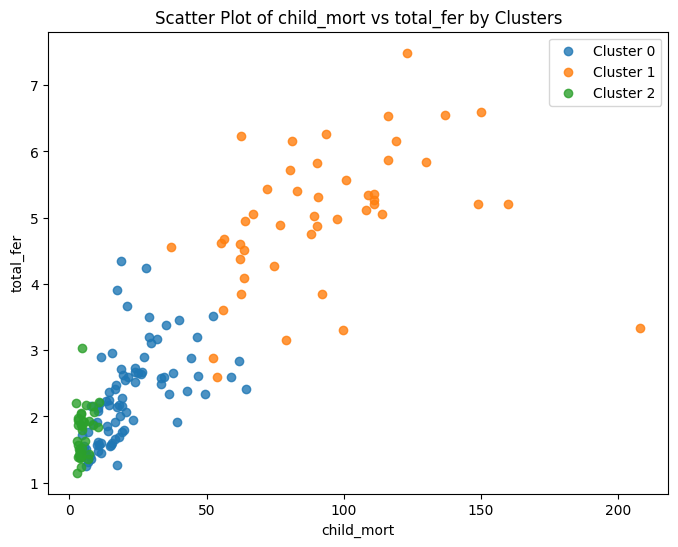

In [28]:
feat = ['child_mort', 'total_fer']
plt.figure(figsize=(8, 6))
for cluster_label in range(k):
    cluster_data = cdf[cdf['cluster_label'] == cluster_label]
    plt.scatter(cluster_data[feat[0]], cluster_data[feat[1]], label=f'Cluster {cluster_label}', alpha=0.8)

plt.title(f'Scatter Plot of {feat[0]} vs {feat[1]} by Clusters')
plt.xlabel(feat[0])
plt.ylabel(feat[1])
plt.legend()
plt.show()

*Lower (or higher) mortality might induce lower (or higher) fertility, but it is well established that higher birth rates lead to higher infant and child mortality. This higher mortality is related to the effect on infants and children of earlier weaning and reduced care from mothers.*
***Source***- https://www.ncbi.nlm.nih.gov/books/NBK233807/#:~:text=Lower%20(or%20higher)%20mortality%20might,and%20reduced%20care%20from%20mothers.


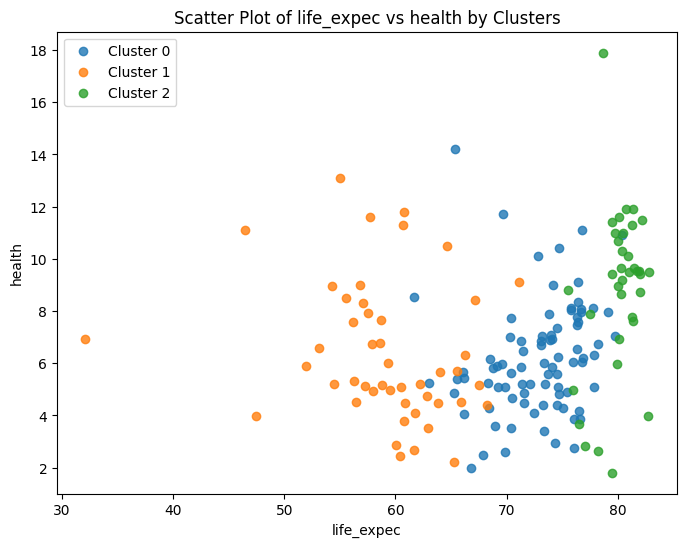

In [29]:
feat = ['life_expec', 'health']
plt.figure(figsize=(8, 6))
for cluster_label in range(k):
    cluster_data = cdf[cdf['cluster_label'] == cluster_label]
    plt.scatter(cluster_data[feat[0]], cluster_data[feat[1]], label=f'Cluster {cluster_label}', alpha=0.8)

plt.title(f'Scatter Plot of {feat[0]} vs {feat[1]} by Clusters')
plt.xlabel(feat[0])
plt.ylabel(feat[1])
plt.legend()
plt.show()

Cluster 2 has least life expect and many of them are still spending a lot on health but there life expect is low, they have to be focused.

Cluster 1 has to still improve because some of them are spending a lot where there life expec could be better.

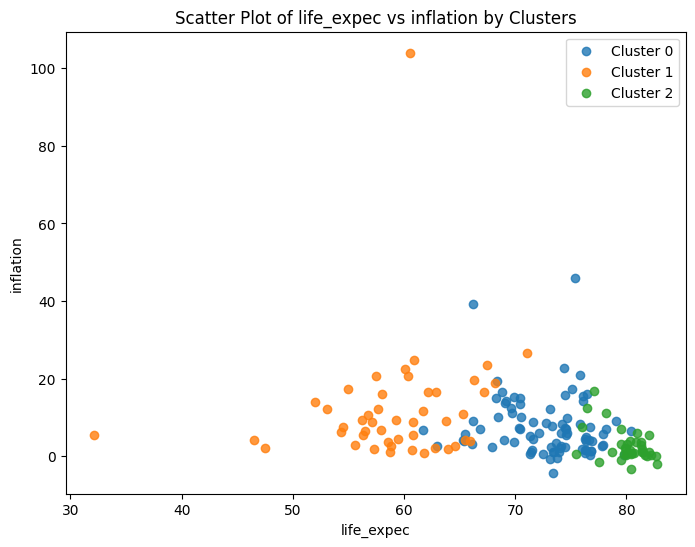

In [30]:
feat = ['life_expec', 'inflation']
plt.figure(figsize=(8, 6))
for cluster_label in range(k):
    cluster_data = cdf[cdf['cluster_label'] == cluster_label]
    plt.scatter(cluster_data[feat[0]], cluster_data[feat[1]], label=f'Cluster {cluster_label}', alpha=0.8)

plt.title(f'Scatter Plot of {feat[0]} vs {feat[1]} by Clusters')
plt.xlabel(feat[0])
plt.ylabel(feat[1])
plt.legend()
plt.show()

Inflation is almost same for all but life expect should be improved.

One of the country from Cluster 2 has a very high inflation where its life expec is still less.

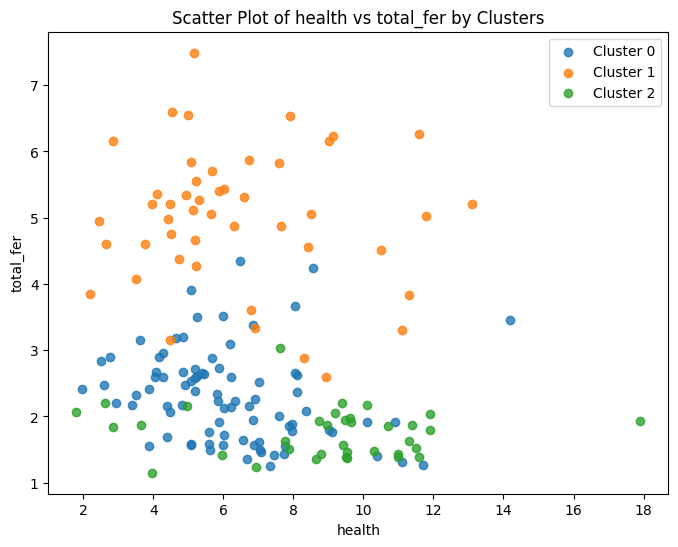

In [31]:
feat = ['health', 'total_fer']
plt.figure(figsize=(8, 6))
for cluster_label in range(k):
    cluster_data = cdf[cdf['cluster_label'] == cluster_label]
    plt.scatter(cluster_data[feat[0]], cluster_data[feat[1]], label=f'Cluster {cluster_label}', alpha=0.8)

plt.title(f'Scatter Plot of {feat[0]} vs {feat[1]} by Clusters')
plt.xlabel(feat[0])
plt.ylabel(feat[1])
plt.legend()
plt.show()

Many of the Cluster 2 countries should be focused on its health spend.

# CONCLUSION

1. The countries of Cluster 2 namely-

 Afghanistan, Angola, Benin,Botswana, Burkina Faso,Burundi,Cameroo, Central African Republic,Chad, Comoros, Congo, Dem. Rep.,Congo, Rep.,Cote d'Ivoire,Equatorial Gui,Kenya, Kiribati, Lao, Lesotho, Liberia, Madagascar, Malawi, Mali, Mauritania, Mozambique, Namibia, Niger,Nigeria, Pakistan, Rwanda, Senegal, Sierra Leone, South Africa, Sudan, Tanzania, Timor-Leste, Togo, Uganda, Yemen, Zambia;
 needs to improve there health rate and even there economy.

2. Countries of Cluster 1 like, Alberia, Angenia, Veninzula, Veitname etc. comes on average in terms of health rate. Although some may be improving there economy but they also need to work on there health rate with keeping economy alonhside.
3. Countries of Cluster 0 namely, Australia, US, UAE are mostly having good economy and health rate and they should maintain that.
